## Support Vector Classifier Implementation 

In [1]:
# !pip install seaborn

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 



In [3]:
## Creating synthetic datapoint 
from sklearn.datasets import make_classification


In [4]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=1000,
    n_features=2,
    n_classes=2,
    n_clusters_per_class=1,
    n_redundant=0
)


In [5]:
X

array([[ 0.805812  , -2.06631493],
       [ 0.80063582, -2.10490385],
       [ 1.23851783, -1.49733878],
       ...,
       [-0.04553302,  0.52498361],
       [ 0.19159473, -0.56405455],
       [-1.04350995,  0.66353237]])

In [6]:
pd.DataFrame(X)[0]

0      0.805812
1      0.800636
2      1.238518
3      0.718386
4     -2.124899
         ...   
995    0.843985
996    0.834411
997   -0.045533
998    0.191595
999   -1.043510
Name: 0, Length: 1000, dtype: float64

<AxesSubplot:xlabel='0', ylabel='1'>

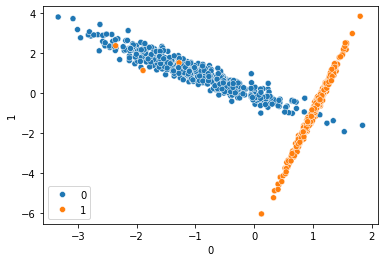

In [7]:
import seaborn as sns
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 42)

In [9]:
from sklearn.svm import SVC

svc = SVC(kernel='linear')


In [10]:
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [11]:
y_pred = svc.predict(X_test)

In [12]:
print(y_test)

[0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 1 0 0 1 1 1 0 0 0 1 1 0 1 0 1 1 0 1 0 0 1
 0 0 0 1 0 0 1 1 0 1 1 0 1 1 1 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0
 1 0 0 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 1 1 1 0 0 1 1 0 1 0 1 0
 0 0 1 1 0 0 1 1 0 1 0 1 0 1 0 0 0 1 1 0 0 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 0
 1 1 1 1 0 1 1 1 0 0 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0
 0 1 1 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 1 1 1 0 0 1 1 0 1 0 0
 0 0 0 0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0]


In [13]:
from sklearn.metrics import classification_report,confusion_matrix


In [14]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       135
           1       0.97      0.99      0.98       115

    accuracy                           0.98       250
   macro avg       0.98      0.98      0.98       250
weighted avg       0.98      0.98      0.98       250



In [15]:
print("Confustion Matrix",confusion_matrix(y_test,y_pred))

Confustion Matrix [[132   3]
 [  1 114]]


<AxesSubplot:>

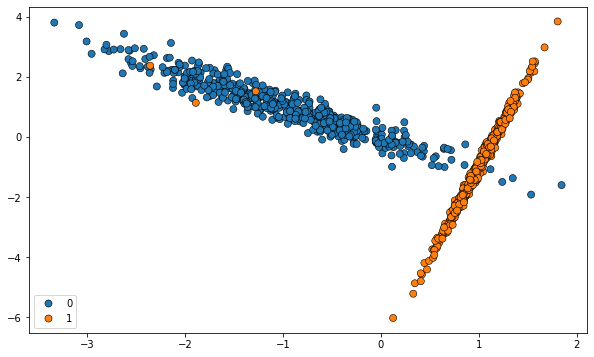

In [16]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = X[:,0],y =X[:,1],hue=y,edgecolor='k',s =50)

In [17]:
# Getting the coefficients and intercept of the decision boundary
coef = svc.coef_[0]
intercept = svc.intercept_[0]
print(coef)
print(intercept)

[ 2.25401191 -0.37400413]
-1.5472233417501111


In [18]:
# Calculating the slope and intercept for the decision boundary
slop = -coef[0]/coef[1]
intercept = intercept /coef[1]
print(slop)
print(coef)

6.026703280554049
[ 2.25401191 -0.37400413]


In [19]:
# Creating a range of values for x
x_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)

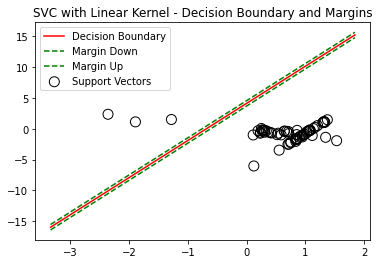

Equation of the decision boundary: 2.25 * x0 + -0.37 * x1 + -1.55 = 0


In [20]:
# Decision boundary
decision_boundary = slop * x_range + intercept
plt.plot(x_range, decision_boundary, 'r', label='Decision Boundary')
# Margins (parallel lines to the decision boundary)
margin = 1 / np.sqrt(np.sum(coef ** 2))
decision_boundary_down = decision_boundary - margin
decision_boundary_up = decision_boundary + margin

plt.plot(x_range, decision_boundary_down, 'g--', label='Margin Down')
plt.plot(x_range, decision_boundary_up, 'g--', label='Margin Up')

# Highlight the support vectors
plt.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], s=100, 
            facecolors='none', edgecolors='k', label='Support Vectors')

plt.legend()
plt.title('SVC with Linear Kernel - Decision Boundary and Margins')
plt.show()

# Print the equation of the decision boundary
print(f"Equation of the decision boundary: {coef[0]:.2f} * x0 + {coef[1]:.2f} * x1 + {svc.intercept_[0]:.2f} = 0")

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score = accuracy_score(y_test,y_pred)
print(accuracy_score)

0.984


In [22]:
rbf = SVC(kernel = 'rbf')

In [23]:
rbf.fit(X_train,y_train)

SVC()

In [24]:
y_pred = rbf.predict(X_test)

In [25]:
print("Classification report",classification_report(y_test,y_pred))

Classification report               precision    recall  f1-score   support

           0       0.99      0.98      0.99       135
           1       0.97      0.99      0.98       115

    accuracy                           0.98       250
   macro avg       0.98      0.98      0.98       250
weighted avg       0.98      0.98      0.98       250



In [26]:
print("Confustion matrix",confusion_matrix(y_test,y_pred))

Confustion matrix [[132   3]
 [  1 114]]


In [27]:
from sklearn.model_selection import GridSearchCV
params_grid = {'C':[0.1,1,10,100,1000],
               'gamma':[1,0.1,0.01,0.001,0.0001],
               'kernel':['linear', 'poly', 'rbf', 'sigmoid']}


In [28]:
from sklearn.model_selection import GridSearchCV
grid =GridSearchCV(SVC(),param_grid=params_grid,cv=5,verbose=3,refit=True)

In [29]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.967 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.980 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.967 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.973 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.973 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.980 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.987 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.980 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.980 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.987 total time=   0.0s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.967 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rb

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=3)

In [30]:
print("Best Parameters found",grid.best_params_)

Best Parameters found {'C': 10, 'gamma': 1, 'kernel': 'rbf'}


In [31]:
y_pred = grid.predict(X_test)

In [32]:
print(y_pred)

[0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 1 0 0 1 1 1 0 0 0 1 1 0 1 0 1 1 0 1 0 0 1
 0 0 0 1 0 0 1 1 0 1 1 0 1 1 1 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0
 1 0 0 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 1 1 1 0 0 1 1 0 1 0 1 0
 0 0 1 1 0 0 1 1 0 1 0 1 0 1 0 0 0 1 1 0 0 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 0
 1 1 1 1 0 1 1 1 0 0 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0
 0 1 1 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 1 1 0 1 0 0
 0 0 0 1 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0]


In [33]:
# Calculate and print the accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the best model: {accuracy:.2f}")

Accuracy of the best model: 0.99
